In [12]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as matlib

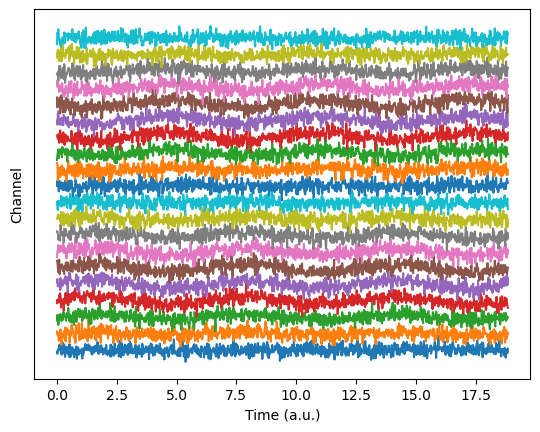

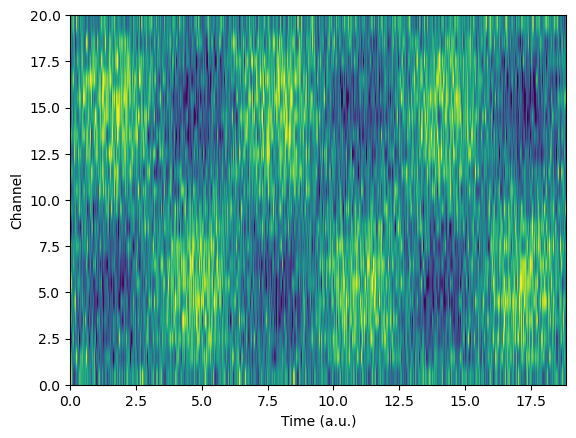

In [266]:
N = 1000
M = 20

t = np.linspace(0, 6 * np.pi, N)

chan_rel = np.sin(np.linspace(0, 2 * np.pi, M))

data = np.zeros((M, N))

for m_i in range(M):
    data[m_i:] = np.sin(t) * chan_rel[m_i]
    
data = data + np.random.randn(M, N) #/ 100

for i in range(M):
    plt.plot(t, data[i, :] + i * 4)

plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')

plt.show()

plt.imshow(data, aspect='auto', vmin=-2, vmax=2, extent=[t[0], t[-1], 0, M])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')

plt.show()

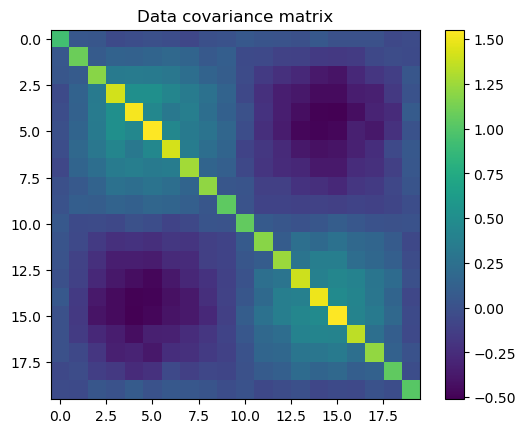

In [267]:
data_cov_mat = np.cov(data)

plt.imshow(data_cov_mat)
plt.colorbar()
plt.title('Data covariance matrix')

plt.show()

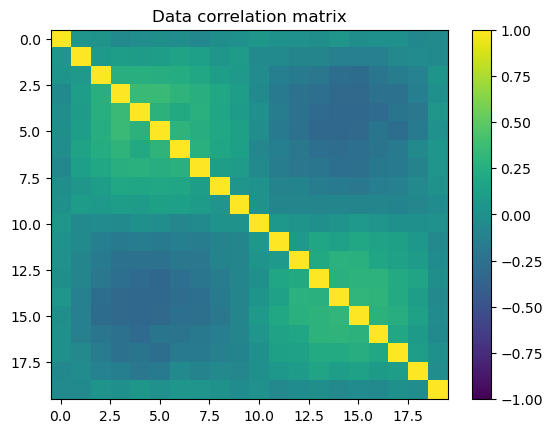

In [268]:
data_corr_mat = np.corrcoef(data)

plt.imshow(data_corr_mat, vmin=-1, vmax=1, aspect='auto')
plt.colorbar()
plt.title('Data correlation matrix')

plt.show()

In [322]:
N = 1000
M = 20
lower_noise_bound = 0.001
upper_noise_bound = 1
random_noise = np.linspace(lower_noise_bound, upper_noise_bound, 20)

t = np.linspace(0, 6 * np.pi, N)

chan_rel = np.sin(np.linspace(0, 2 * np.pi, M))

data = np.zeros((len(random_noise), M, N))

for i, rand_noise in enumerate(random_noise): 
    for m_i in range(M):
        data[i, m_i:] = np.sin(t) * chan_rel[m_i]
    
    data[i] = data[i] + np.random.randn(M, N) * rand_noise

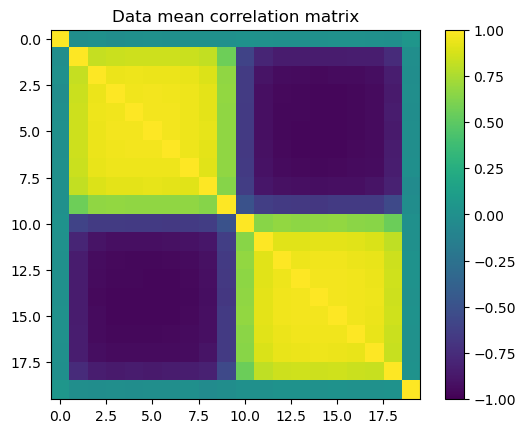

In [324]:
data_mean = np.mean(data, axis=0)
corr = np.corrcoef(data_mean)

plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar()
plt.title('Data mean correlation matrix')

plt.show()

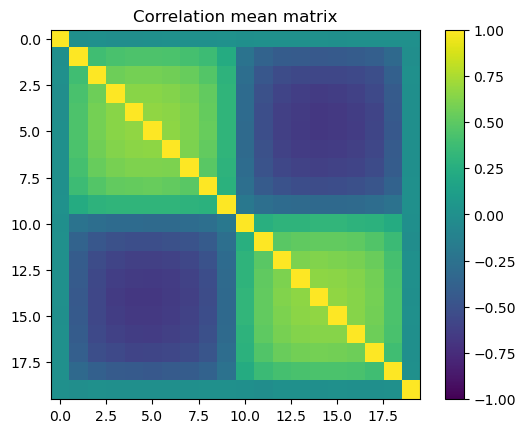

In [326]:
corrs = np.zeros((len(random_noise), M, M))

for i in range(len(random_noise)):
    corrs[i] = np.corrcoef(data[i])
    
corr_mean = np.mean(corrs, axis=0)

plt.imshow(corr_mean, vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation mean matrix')

plt.show()

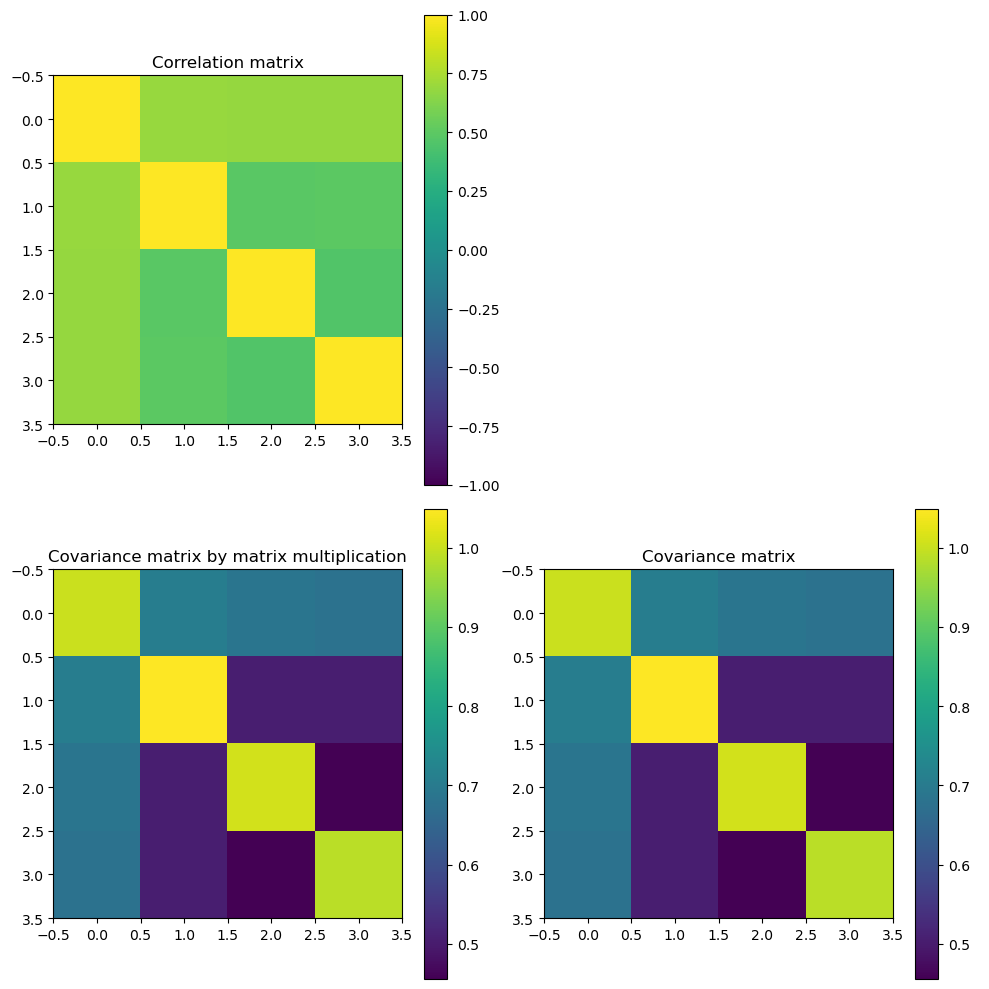

In [438]:
N = 1000
r = 0.7

data_1 = np.random.randn(N)
data_2 = np.random.randn(N)
data_3 = np.random.randn(N)
data_4 = np.random.randn(N)

data_2 = data_1 * r + data_2 * np.sqrt(1 - r ** 2)
data_3 = data_1 * r + data_3 * np.sqrt(1 - r ** 2)
data_4 = data_1 * r + data_4 * np.sqrt(1 - r ** 2)

corr = np.corrcoef(np.vstack((data_1, data_2, data_3, data_4)))

data_1_std = np.std(data_1, ddof=1)
data_2_std = np.std(data_2, ddof=1)
data_3_std = np.std(data_3, ddof=1)
data_4_std = np.std(data_4, ddof=1)

data_diag_std = np.zeros((4, 4))

np.fill_diagonal(data_diag_std, (data_1_std, data_2_std, data_3_std, data_4_std))

cov = np.dot(np.dot(data_diag_std, corr), data_diag_std)

cov_2 = np.cov(np.vstack((data_1, data_2, data_3, data_4)))

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

im_show_1 = ax[0, 0].imshow(corr, vmin=-1, vmax=1)
plt.colorbar(im_show_1, ax=ax[0, 0])
ax[0, 0].set_title('Correlation matrix')

im_show_2 = ax[1, 0].imshow(cov)
plt.colorbar(im_show_2, ax=ax[1, 0])
ax[1, 0].set_title('Covariance matrix by matrix multiplication')

im_show_3 = ax[1, 1].imshow(cov_2)
plt.colorbar(im_show_2, ax=ax[1, 1])
ax[1, 1].set_title('Covariance matrix')

ax[0, 1].axis('off')

plt.tight_layout()
plt.show()